In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [100]:
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math
import random

In [293]:
numOfQubits = 4
readoutBits = numOfQubits
qreg = QuantumRegister(numOfQubits)
creg = ClassicalRegister(readoutBits)

gen = QuantumCircuit(qreg, creg)
#================================================#

#*************************************************
#Build initial rotation gates
def initRot(qc):
    #qc.rx(math.pi, qreg[0:numOfQubits+1])
    #qc.rx(math.pi, qreg[0:numOfQubits+1])
    #qc.rz(math.pi, qreg[0:numOfQubits+1])
    qc.barrier()
    
#*************************************************

#initRot(gen)
#gen.draw()

#Build All-to-All qubit connectivity 

paramList = [random.random() for i in range(math.factorial(numOfQubits-1))]

def connectAllQubits(qc, paramList):
    count = 0
    qc.h(qreg)
    for controlQubit in range(numOfQubits-1):
        for targetQubit in range(controlQubit+1,numOfQubits): 
            rot = paramList[count]
            count+=1
            qc.crz(rot, qreg[controlQubit], qreg[targetQubit])
        qc.barrier()
    return paramList
#*************************************************  

#connectAllQubits(gen)
#gen.draw()

#*************************************************
def buildCircuit(qc, layerNum):
    for layer in range(layerNum):
        #initRot(qc)
        connectAllQubits(qc, paramList)
    qc.measure(qreg[0:numOfQubits], creg[0:readoutBits])
#*************************************************

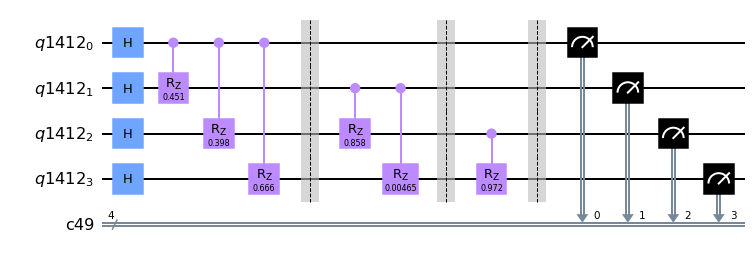

In [294]:
buildCircuit(gen, 1)
gen.draw()

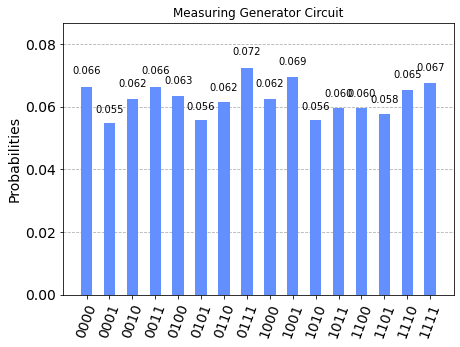

In [295]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
gen = transpile(gen, simulator)

# Run and get counts
result = simulator.run(gen).result()
counts = result.get_counts(gen)
plot_histogram(counts, title='Measuring Generator Circuit')

In [245]:
print("Depth of circuit with "+str(numOfQubits)+" qubits has a depth of "+str(gen.depth())+" and a width of "+str(gen.width())+".")

print("\n", paramList)

Depth of circuit with 4 qubits has a depth of 11 and a width of 8.

 [0.5437024741301567, 0.8075751880549514, 0.7476552438913705, 0.25876453415549105, 0.06732538889499573, 0.6963283197573791]


In [263]:
for i in range(len(paramList)):
    grad = math.sin(2*i)
    print(grad)
    if grad < 1: 
        paramList[i] = paramList[i]+0.1
    else:
        paramList[i] = paramList[i]-0.1
        
print(paramList)

0.0
0.9092974268256817
-0.7568024953079282
-0.27941549819892586
0.9893582466233818
-0.5440211108893698
[1.1437024741301567, 0.6075751880549516, 0.5476552438913705, 0.658764534155491, 0.06732538889499573, 1.096328319757379]


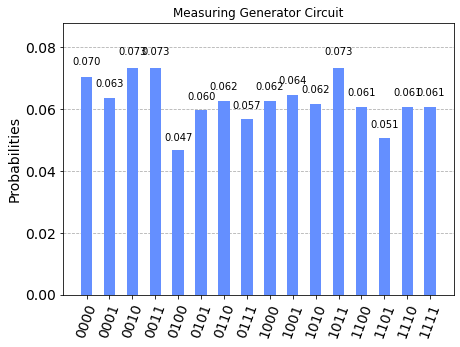

In [264]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
gen = transpile(gen, simulator)

# Run and get counts
result = simulator.run(gen).result()
counts = result.get_counts(gen)
plot_histogram(counts, title='Measuring Generator Circuit')